# Problem 2

## Problem Description
In this problem, you are given a dataset with two input features and one output. You will use a regression tree to make predictions for this data, evaluating each model on both training and testing data. Then, you will repeat this for multiple random forests.

Fill out the notebook as instructed, making the requested plots and printing necessary values. 

*You are welcome to use any of the code provided in the lecture activities.*

#### Summary of deliverables:
- RMSE function
- Create 4 decision tree prediction surface plots
- Create 4 random forest prediction surface plots
- Print RMSE for train and test data for 4 decision tree models
- Print RMSE for train and test data for 4 random forest models
- Answer the 3 questions posed throughout

#### Imports and Utility Functions:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def make_plot(X,y,model, title=""):
    res = 100
    xrange = np.linspace(min(X[:,0]),max(X[:,0]),res)
    yrange = np.linspace(min(X[:,1]),max(X[:,1]),res)
    x1,x2 = np.meshgrid(xrange,yrange)
    xmesh = np.vstack([x1.flatten(),x2.flatten()]).T
    z = model.predict(xmesh).reshape(res,res)
    
    fig = plt.figure(figsize=(12,10))
    plt.subplots_adjust(left=0.3,right=0.9,bottom=.3,top=.9)
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x1,x2,z,cmap=cm.coolwarm,linewidth=0,alpha=0.9)
    ax.scatter(X[:,0],X[:,1],y,'o',c='black')
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel('y')
    plt.title(title)
    plt.show()

## Load the data
Use the `np.load()` function to load "w5-hw2-train.npy" (training data) and "w5-hw2-test.npy" (testing data). The first two columns of each are the input features. The last column is the output.
You should end up with 4 variables, input and output for each of the datasets.

In [4]:
# YOUR CODE GOES HERE
data_train = np.load("data/w5-hw2-train.npy")
data_test = np.load("data/w5-hw2-test.npy")

X_train = data_train[:, 0:-1]
y_train = data_train[:, -1]

X_test = data_test[:, 0:-1]
y_test = data_test[:, -1]


## RMSE function
Complete a root-mean-squared-error function, `RMSE(y, pred)`, which takes in two arrays, and computes the RMSE between them:

In [6]:
def RMSE(y, pred):
    # YOUR CODE GOES HERE
    rms = np.sqrt(np.sum(np.square(pred - y)) / len(y))
    return rms

## Regression trees

Train 4 regression trees in sklearn, with max depth values [2,5,10,25]. Train your models on the training data.

Plot the predictions as a surface plot along with test points -- you can use the provided function: `make_plot(X, y, model, title)`.  
For each model, compute the train and test RMSE by calling your RMSE function. Print these results. 


Max Depth:  2
RMS error for Decision Tree Regressor on training data:  35.47184989095342
RMS error for Decision Tree Regressor on test data:  37.54886839401237


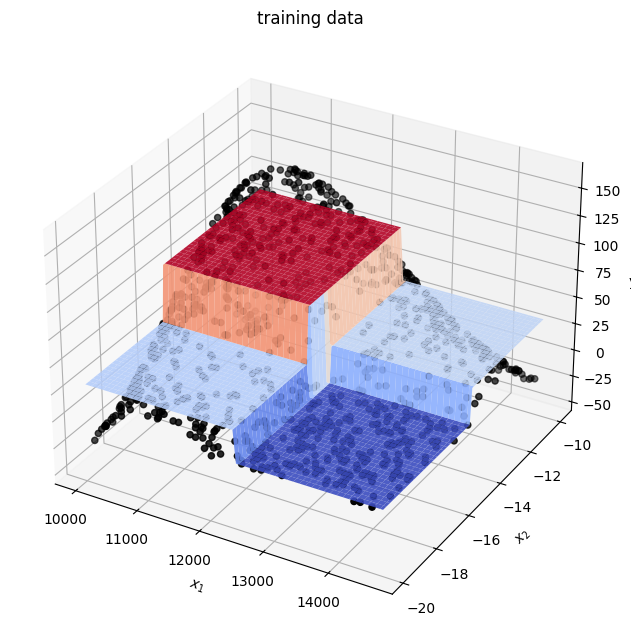

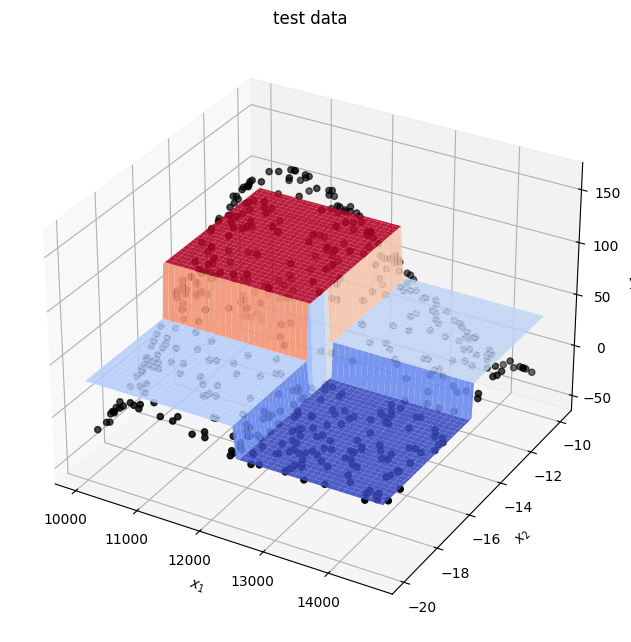


Max Depth:  5
RMS error for Decision Tree Regressor on training data:  17.932673237502154
RMS error for Decision Tree Regressor on test data:  19.02935744931633


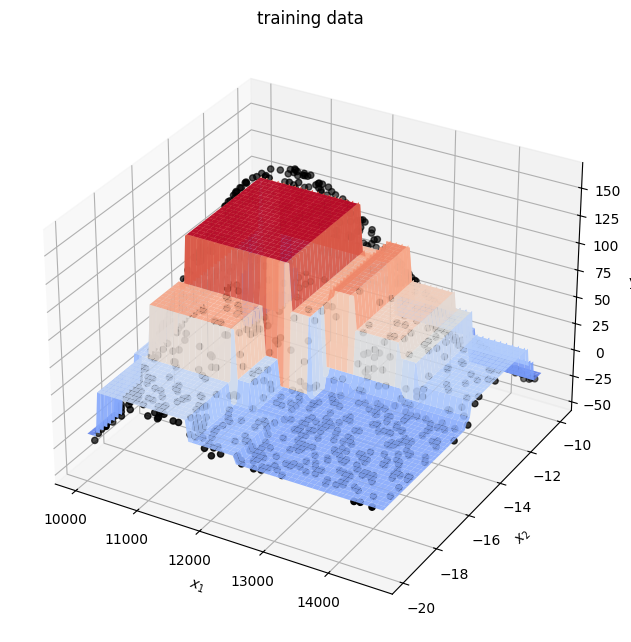

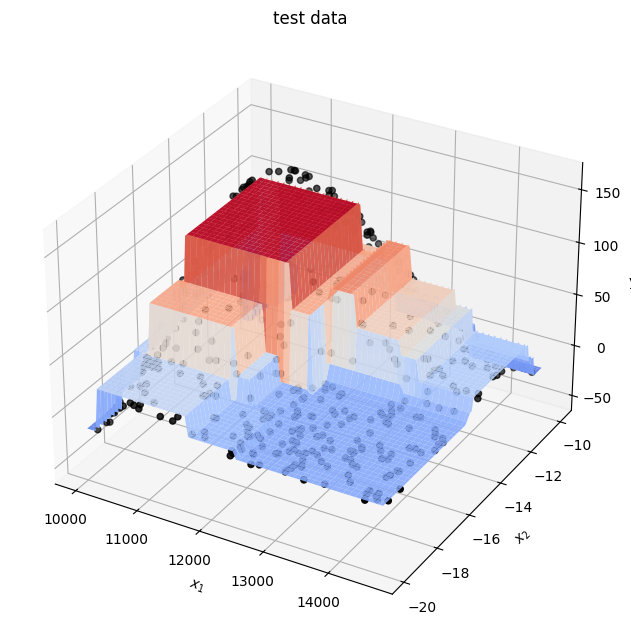


Max Depth:  10
RMS error for Decision Tree Regressor on training data:  4.417134916147934
RMS error for Decision Tree Regressor on test data:  7.811633178930412


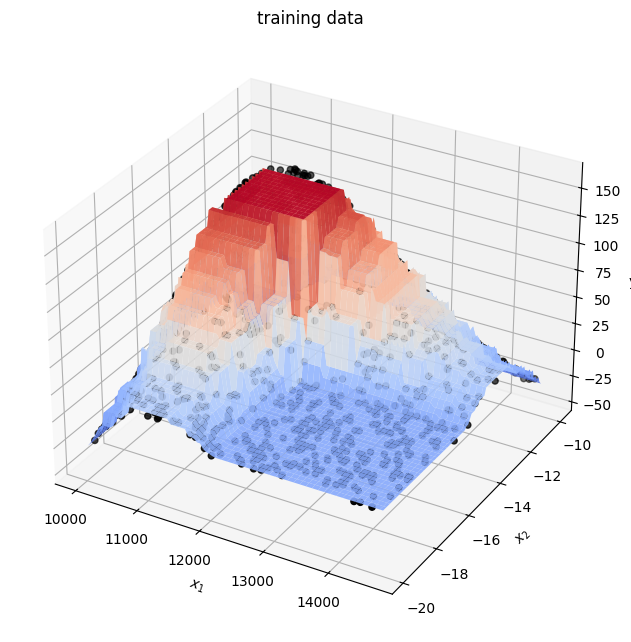

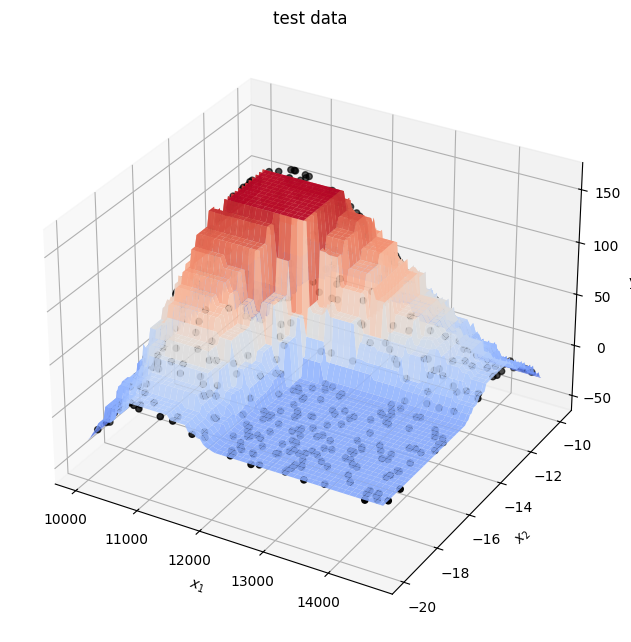


Max Depth:  25
RMS error for Decision Tree Regressor on training data:  0.0
RMS error for Decision Tree Regressor on test data:  5.597397150274175


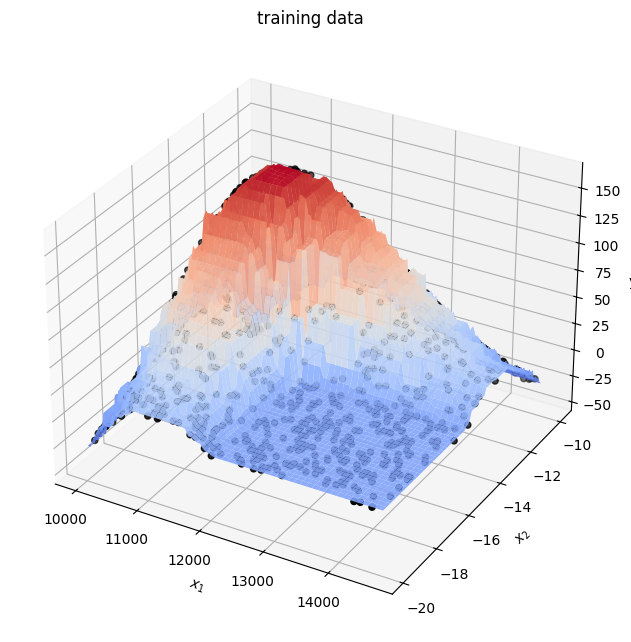

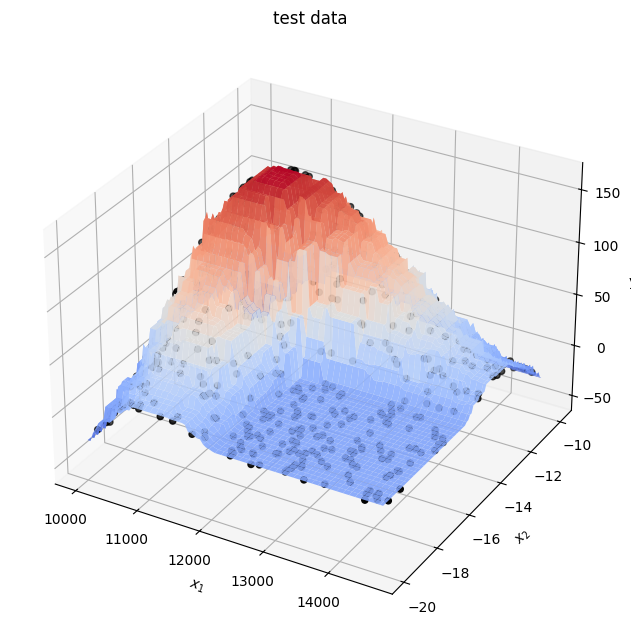

In [13]:
# YOUR CODE GOES HERE
depth = [2, 5, 10, 25]


for i in depth:
    dt = DecisionTreeRegressor(max_depth = i)
    dt.fit(X_train, y_train)
    
    pred_train = dt.predict(X_train)
    pred_test = dt.predict(X_test)
    rms_train = RMSE(y_train, pred_train)
    rms_test = RMSE(y_test, pred_test)

    print("\nMax Depth: ", i)
    print("RMS error for Decision Tree Regressor on training data: ", rms_train)
    print("RMS error for Decision Tree Regressor on test data: ", rms_test)
    make_plot(X_train, y_train, dt, title = "training data")
    make_plot(X_test, y_test, dt, title = "test data")





### Question
- Which of your regression trees performed the best on testing data?  
The model with the maximum depth of 25 performed best on the testing data.

## Regression trees

Train 4 random forests in sklearn. For all of them, use the max depth values from your best-performing regression tree. The number of estimators should vary, with values [5, 10, 25, 100]. 

Plot the predictions as a surface plot along with test points.
Once again, for each model, compute the train and test RMSE by calling your RMSE function. Print these results.


Max Depth:  5
RMS error for Random Forest Regressor on training data:  14.870059581561991
RMS error for Random Forest Regressor on test data:  14.751953582837048


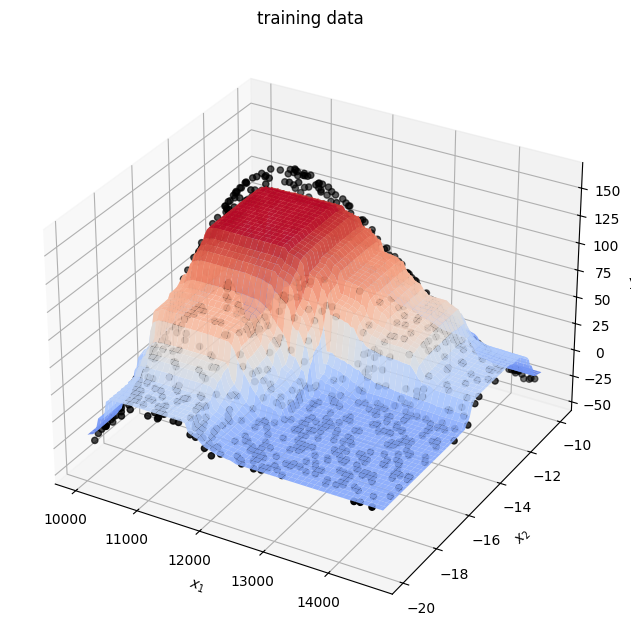

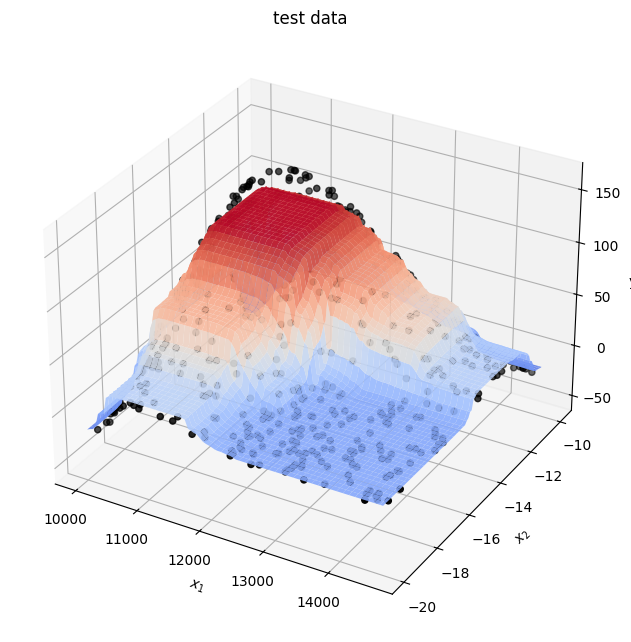


Max Depth:  10
RMS error for Random Forest Regressor on training data:  2.946007563532823
RMS error for Random Forest Regressor on test data:  3.980096503464295


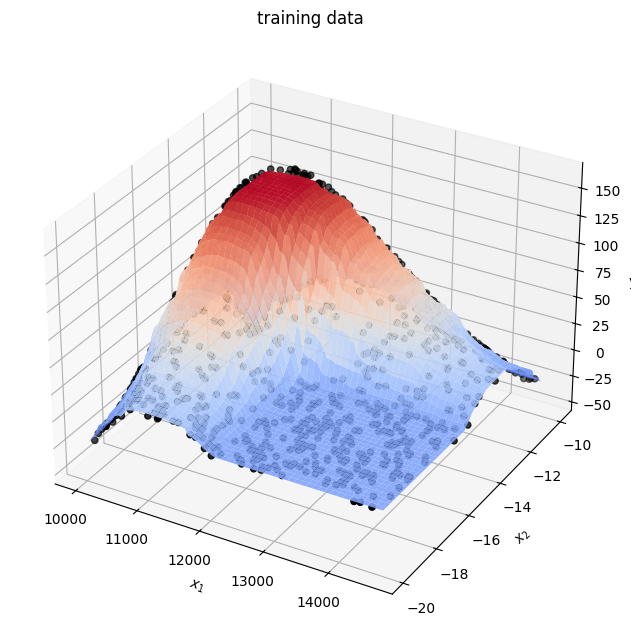

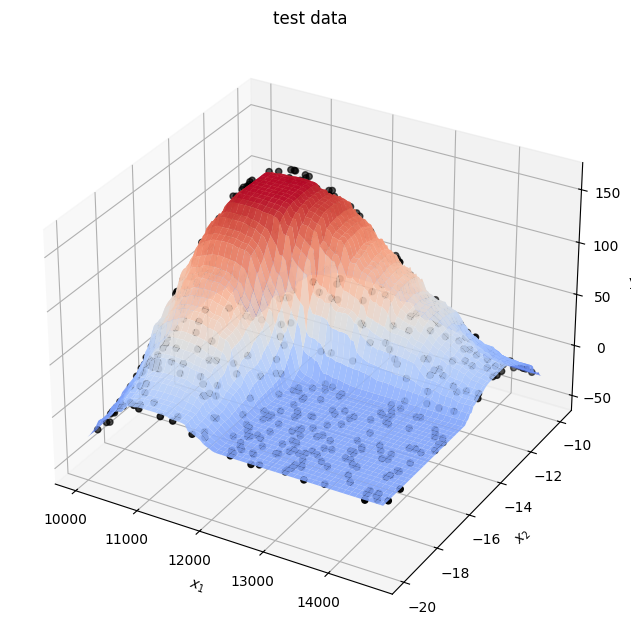


Max Depth:  25
RMS error for Random Forest Regressor on training data:  1.3509754829019005
RMS error for Random Forest Regressor on test data:  3.0555287923736825


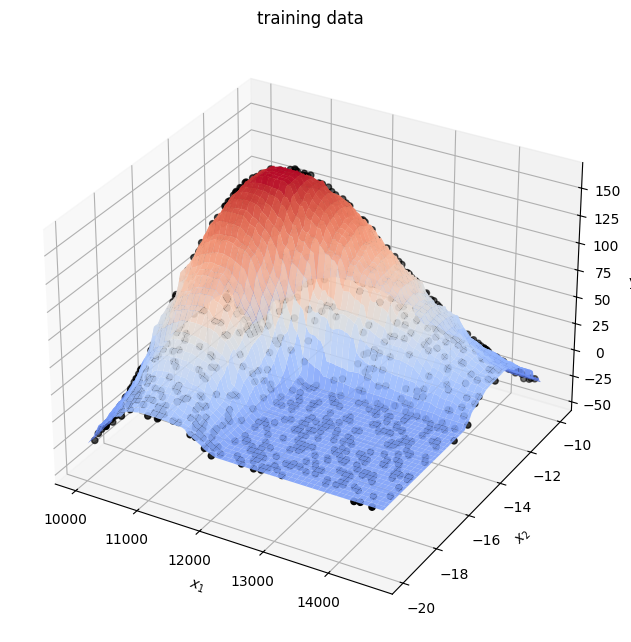

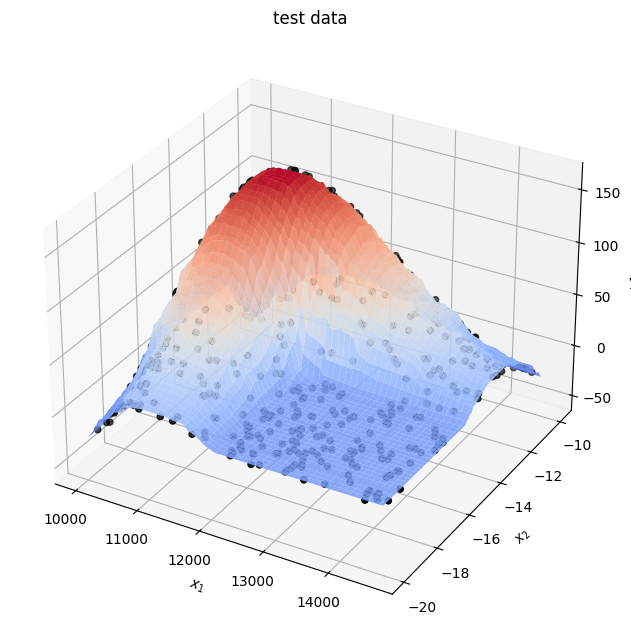


Max Depth:  100
RMS error for Random Forest Regressor on training data:  1.3685013000875361
RMS error for Random Forest Regressor on test data:  2.976915452615326


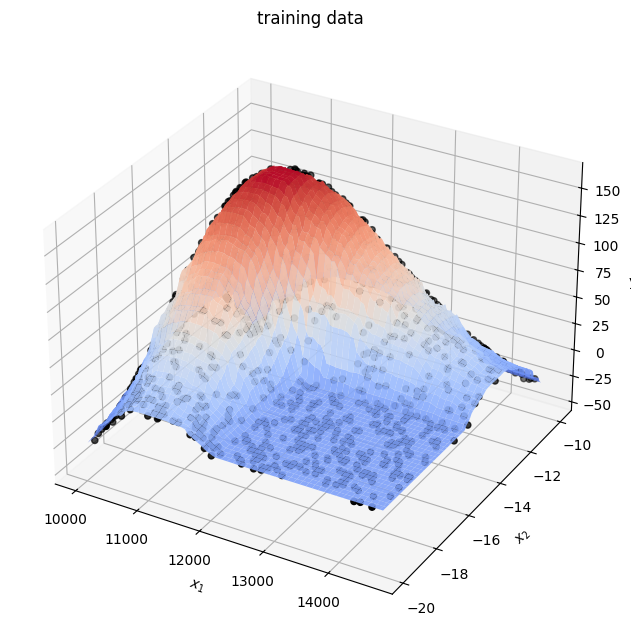

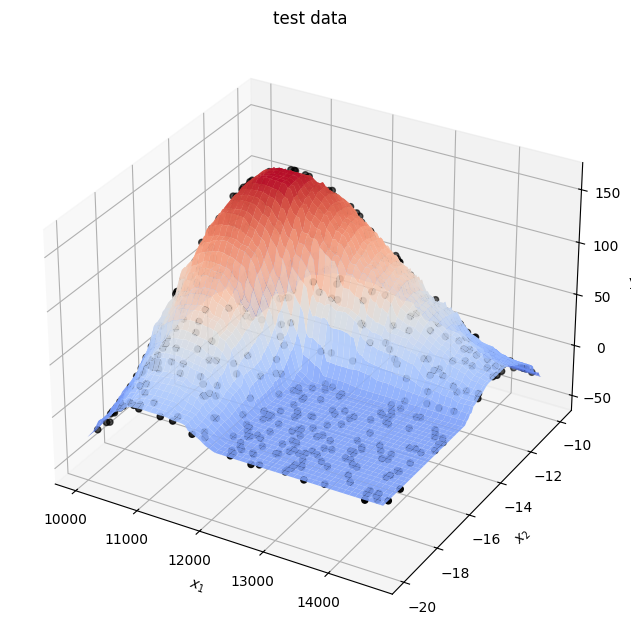

In [14]:
# YOUR CODE GOES HERE
max_depth = [5, 10, 25, 100]

for i in max_depth:
    dt = RandomForestRegressor(max_depth = i)
    dt.fit(X_train, y_train)

    pred_train = dt.predict(X_train)
    pred_test = dt.predict(X_test)
    rms_train = RMSE(y_train, pred_train)
    rms_test = RMSE(y_test, pred_test)

    print("\nMax Depth: ", i)
    print("RMS error for Random Forest Regressor on training data: ", rms_train)
    print("RMS error for Random Forest Regressor on test data: ", rms_test)
    make_plot(X_train, y_train, dt, title = "training data")
    make_plot(X_test, y_test, dt, title = "test data")

### Questions
- Which of your random forests performed the best on testing data?  
Again, the model with the highest maximum depth performed the best on the testing data. This was slightly surprising, since I expected that the model with the highest maximum depth might would be overfit to the training data, resulting in sub-optimal performance in the test data.

- How does the random forest prediction surface differ qualitatively from that of the decision tree? 
The random forest prediction surface is much smoother and without irregularities when compared to that of the decision tree, which is much more discontinuous and jagged. Thanks to the averaging and randomization in the random forest model, leading to it being less sensitive to noise and outliers. 